In [ ]:
import pandas
import matplotlib. pyplot as plt

datalink = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataset = pandas.read_csv(datalink, usecols=[1], engine='python' )

dataset . shape

(144, 1)

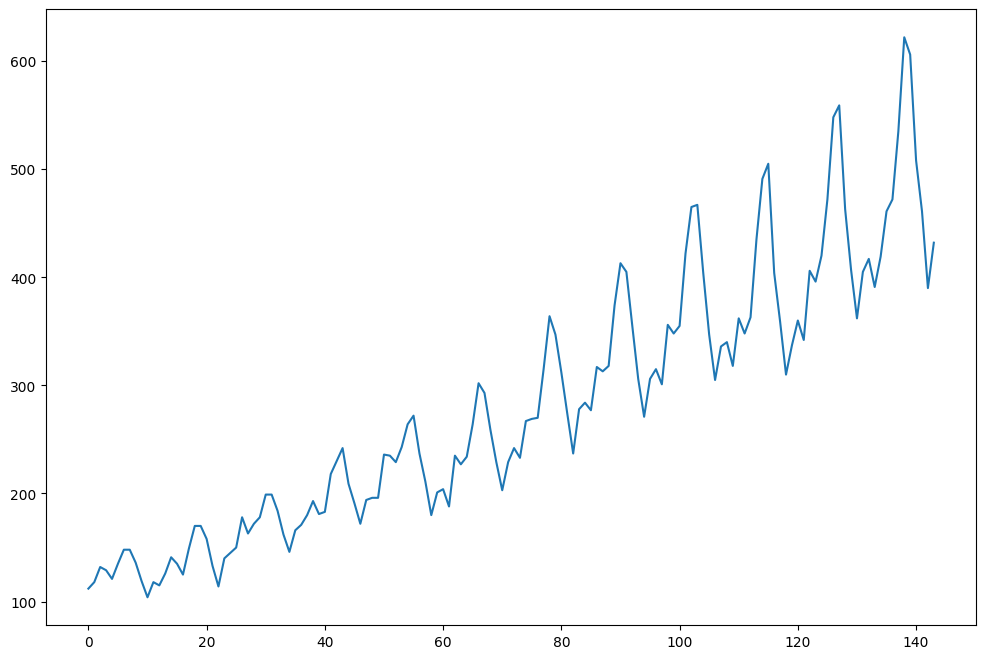

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(dataset)

In [ ]:

import pandas
import matplotlib. pyplot as plt

datalink = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataset = pandas.read_csv(datalink, usecols=[1], engine='python' )

dataset . shape



(144, 1)

In [ ]:
import tensorflow as tf

tf.random.set_seed(7001)

In [ ]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

In [9]:
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [11]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 2s - 17ms/step - loss: 0.0343
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0153
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0119
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0107
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0097
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0087
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0077
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0068
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0059
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0051
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0044
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0038
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0034
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0030
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0025
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0021
Epoch 21

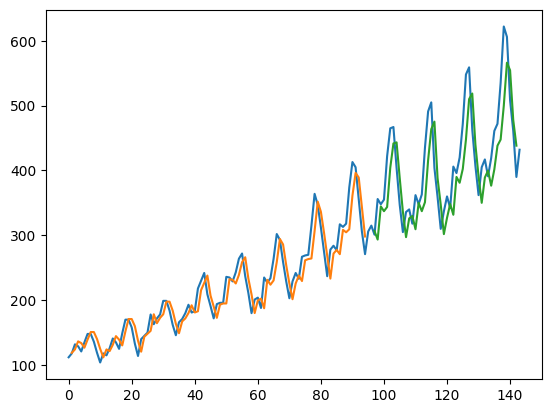

In [13]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % trainScore)

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % testScore)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2) + 1: len(dataset) - 1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()